# Scatterplot

This experiment aims to use scatterplot visualisations to display correlations about water related problems and it's possible reasons in an intuitive way.

Especially, we try to explore the counterintuitive reverse-relationship between water stress and challenges like limited access to clean drinking water and undernourishment in various countries.

### Imports & Dataset

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math
import matplotlib.patches as mpatches
import matplotlib
import os
import sys
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math
import matplotlib.patches as mpatches
import matplotlib

sys.path.insert(1, os.path.abspath(os.getcwd()[:-3]))
from src.aquastat_utils import get_aquastat

df = get_aquastat()

Getting AQUASTAT dataframe from fao_aquastat.csv ...
/home/mobe/Desktop/team-acqua/src/../dat/fao_aquastat.csv already exists.
Getting AQUASTAT dataframe from fao_aquastat.csv ...
/home/mobe/Desktop/team-acqua/src/../dat/fao_aquastat.csv already exists.
Renaming countries ...


### Function for drawing the scatterplot

In [21]:
# TODO:
# - reduce size difference
# - try out different colors to make them more visible
# - remove the year => average over time


def scatterplot(variables, year, sizes=True):
    # Draw a scatterplot. sizes specifies wheter the dots should have a different size

    data = df[['Country', 'Year', *variables]]
    data = data[data['Year'] == year]
    # Exclude certain countries which blow up the diagram
    countries_to_exclude = ["Qatar", "Kuwait", "United Arab Emirates", "Saudi Arabia", "Libya", "Yemen"]
    data = data[~data['Country'].isin(countries_to_exclude)]
    data = data.dropna()

    # Create a 2D scatter plot
    plt.figure(figsize=(10, 6))
    
    # Assuming relevant_vars is a list of relevant column names
    # Initialize lists to store values for each country
    x_values = []
    y_values = []
    color_values = []
    countries = []
    
    # Iterate through the DataFrame
    for index, row in data.iterrows():
        country = row['Country']
        x_values.append(row[variables[0]])
        y_values.append(row[variables[1]])
        color_values.append(row[variables[2]])
        countries.append(country)
    
    # Call plt.scatter once outside the loop
    plt.scatter(x_values, y_values, color_values, c=color_values, cmap='viridis', label=countries)
    #plt.text(x_values, y_values, countries, fontsize=6, ha='right')
    
    # Add labels and title
    plt.xlabel(relevant_vars[0])
    plt.ylabel(relevant_vars[1])
    # Add light grey grid
    plt.grid(True, linestyle='--', alpha=0.7)
    # Add colorbar
    cbar = plt.colorbar()
    cbar.set_label(variables[2])
    
    # Show the plot
    plt.show()

# country scatter plots

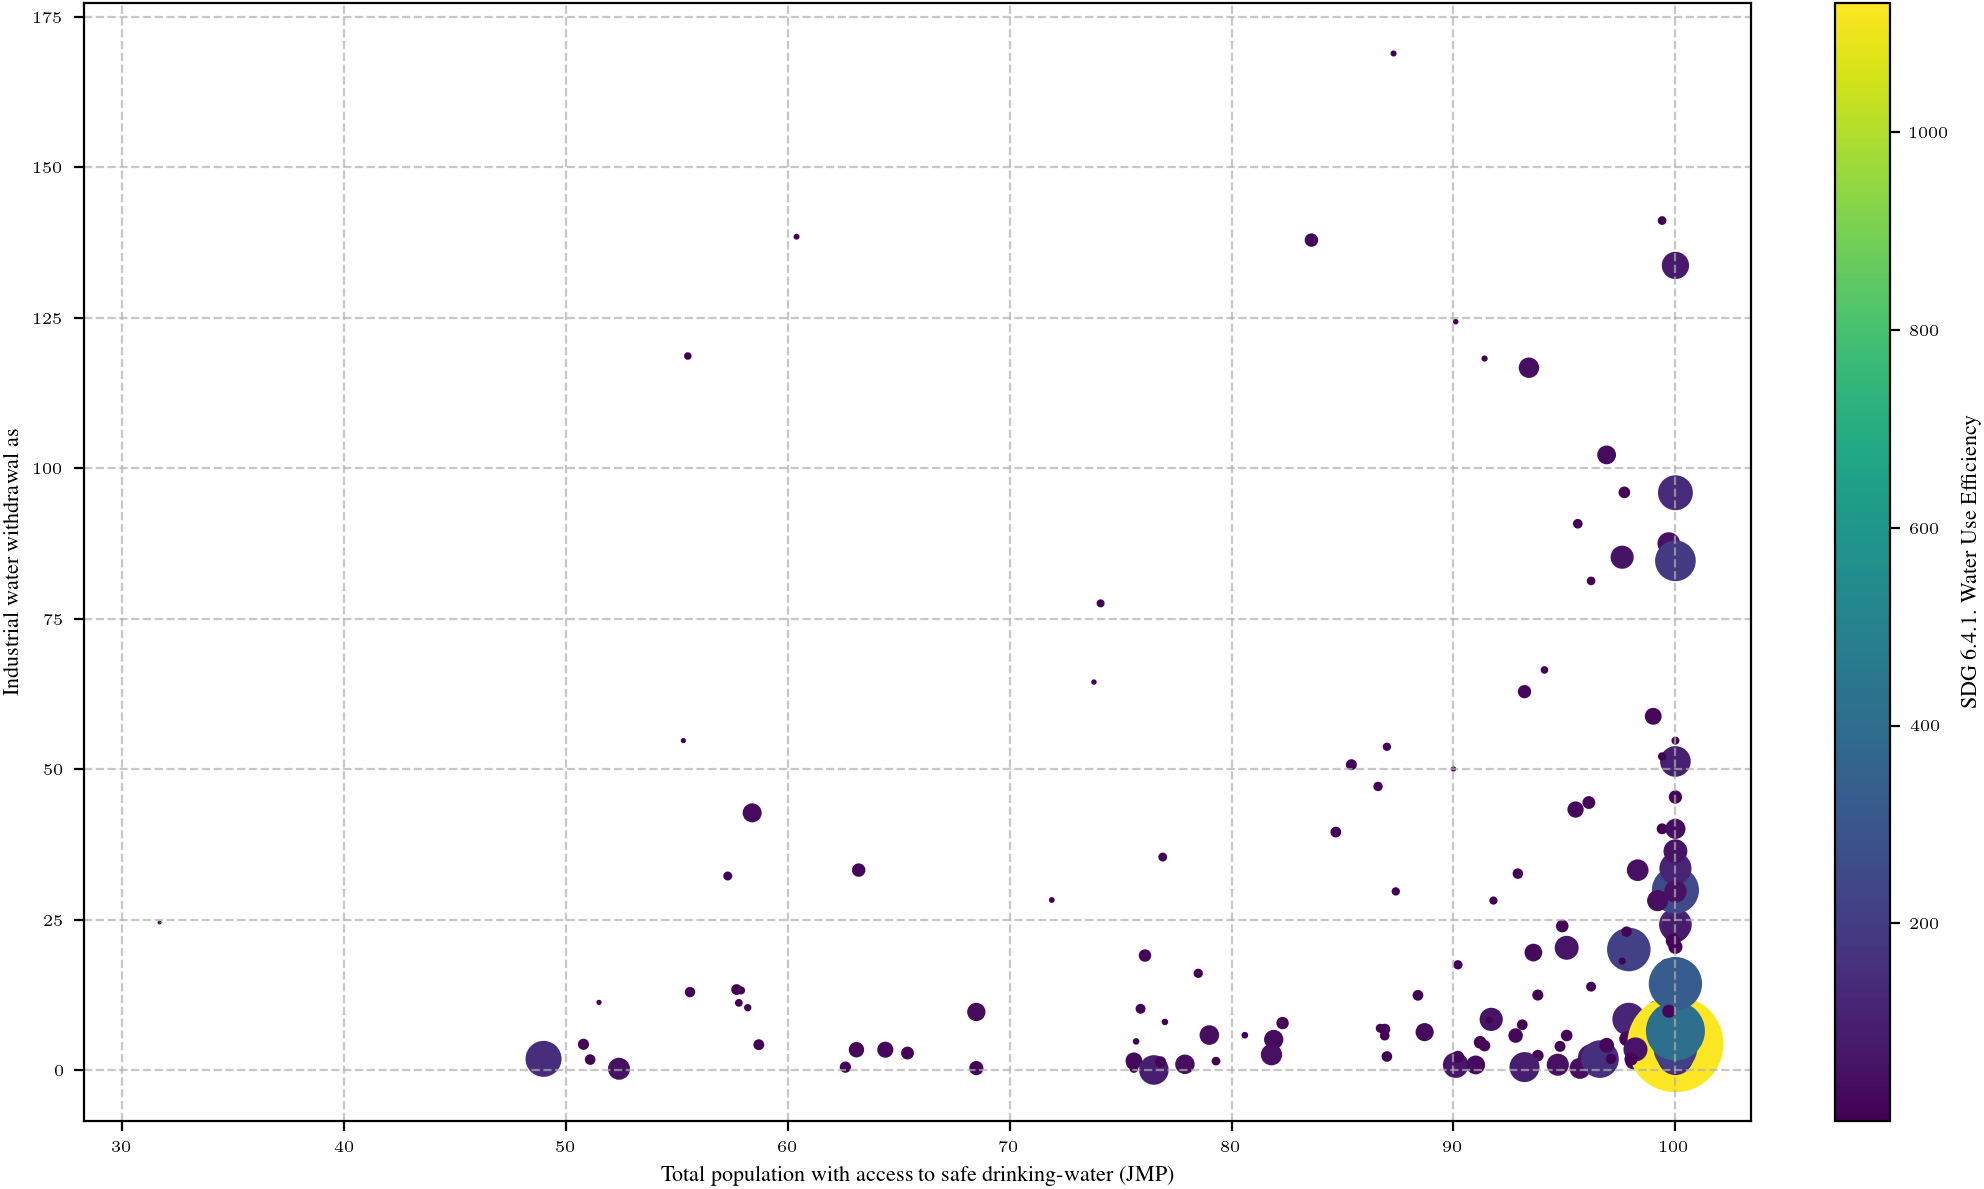

In [27]:

relevant_vars = ['Total population with access to safe drinking-water (JMP)',
                 'Industrial water withdrawal as % of total water withdrawal',
                 'SDG 6.4.1. Water Use Efficiency']

scatterplot(i, 2018)

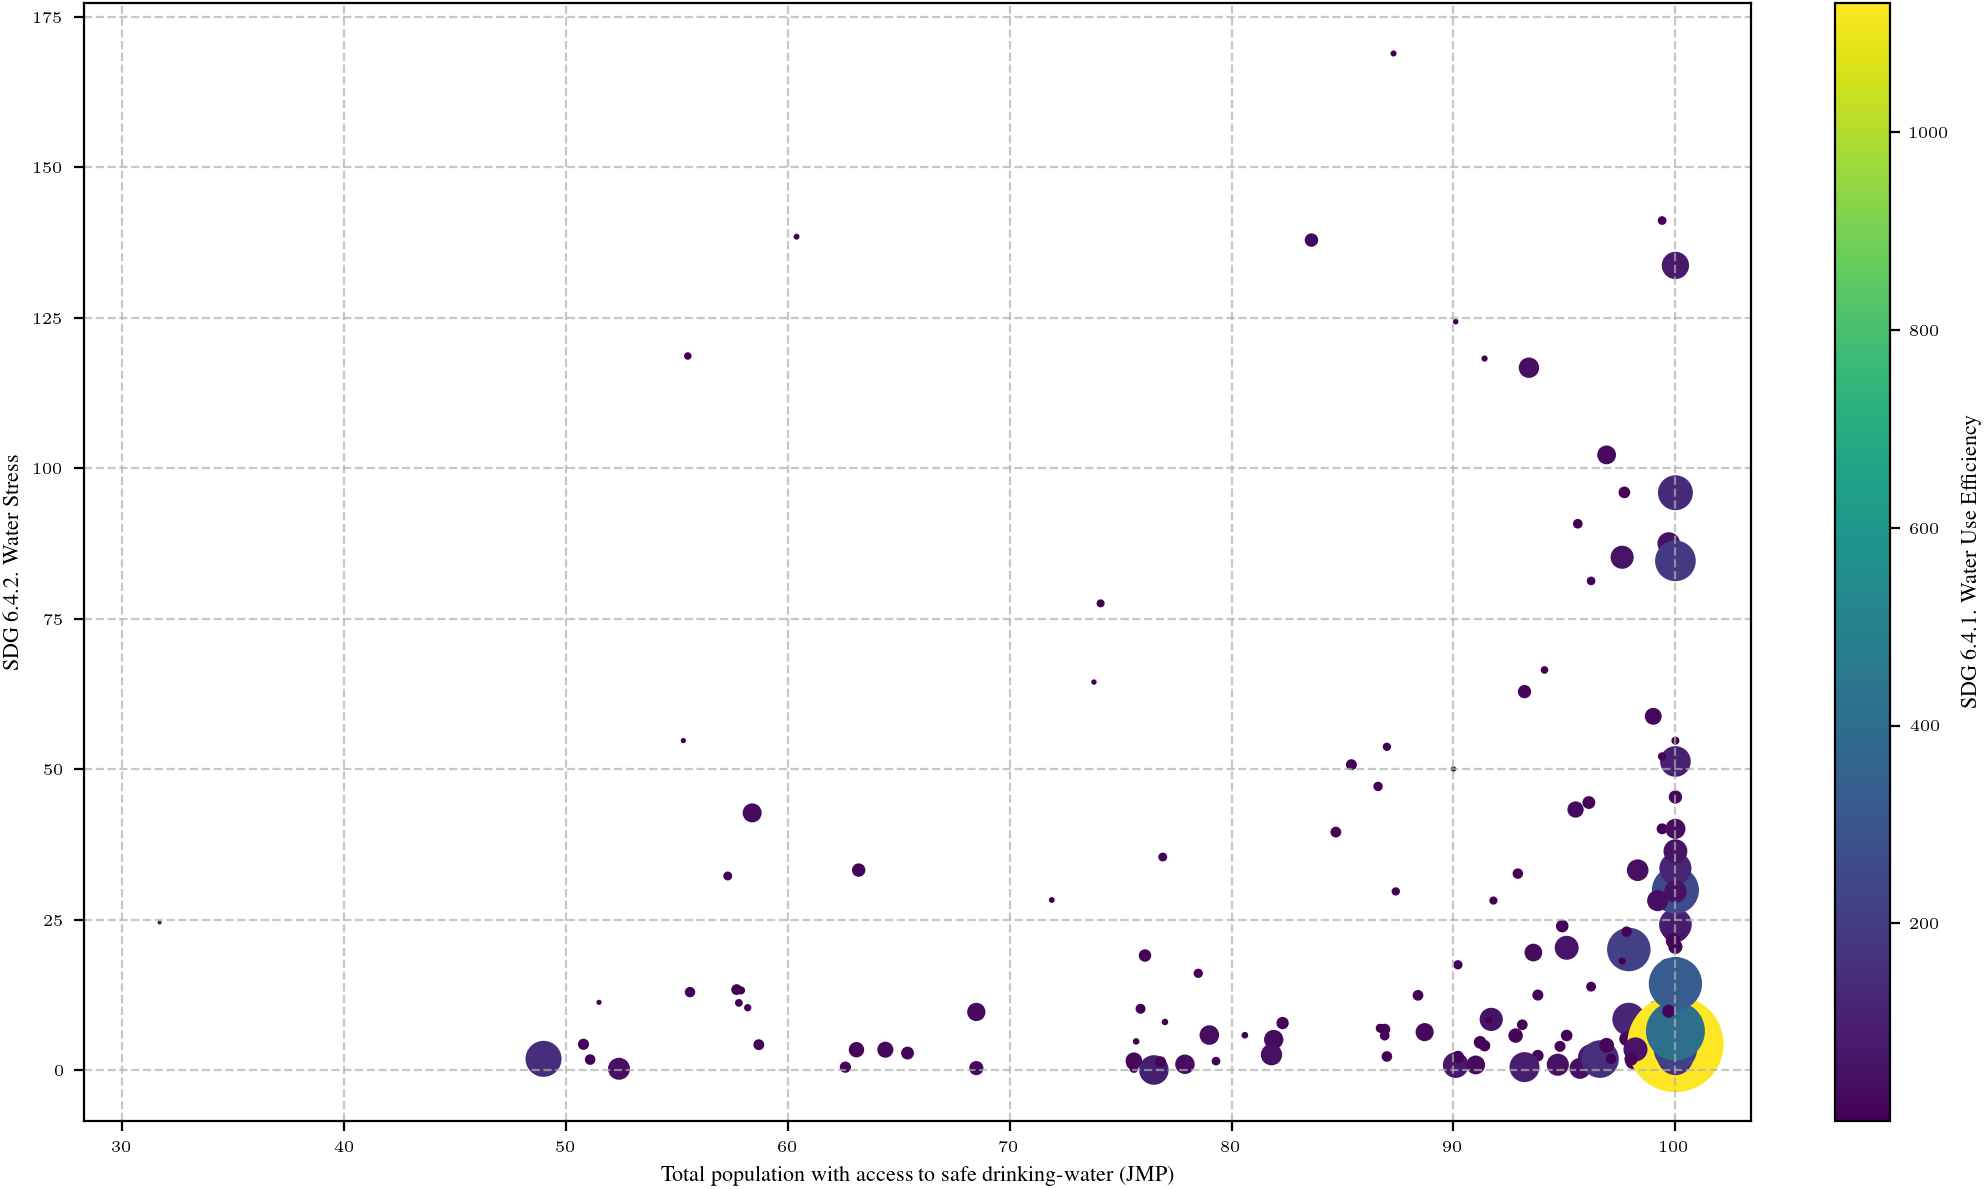

In [28]:
relevant_vars = ['Total population with access to safe drinking-water (JMP)',
                 'SDG 6.4.2. Water Stress',
                 'SDG 6.4.1. Water Use Efficiency']

scatterplot(i, 2018)

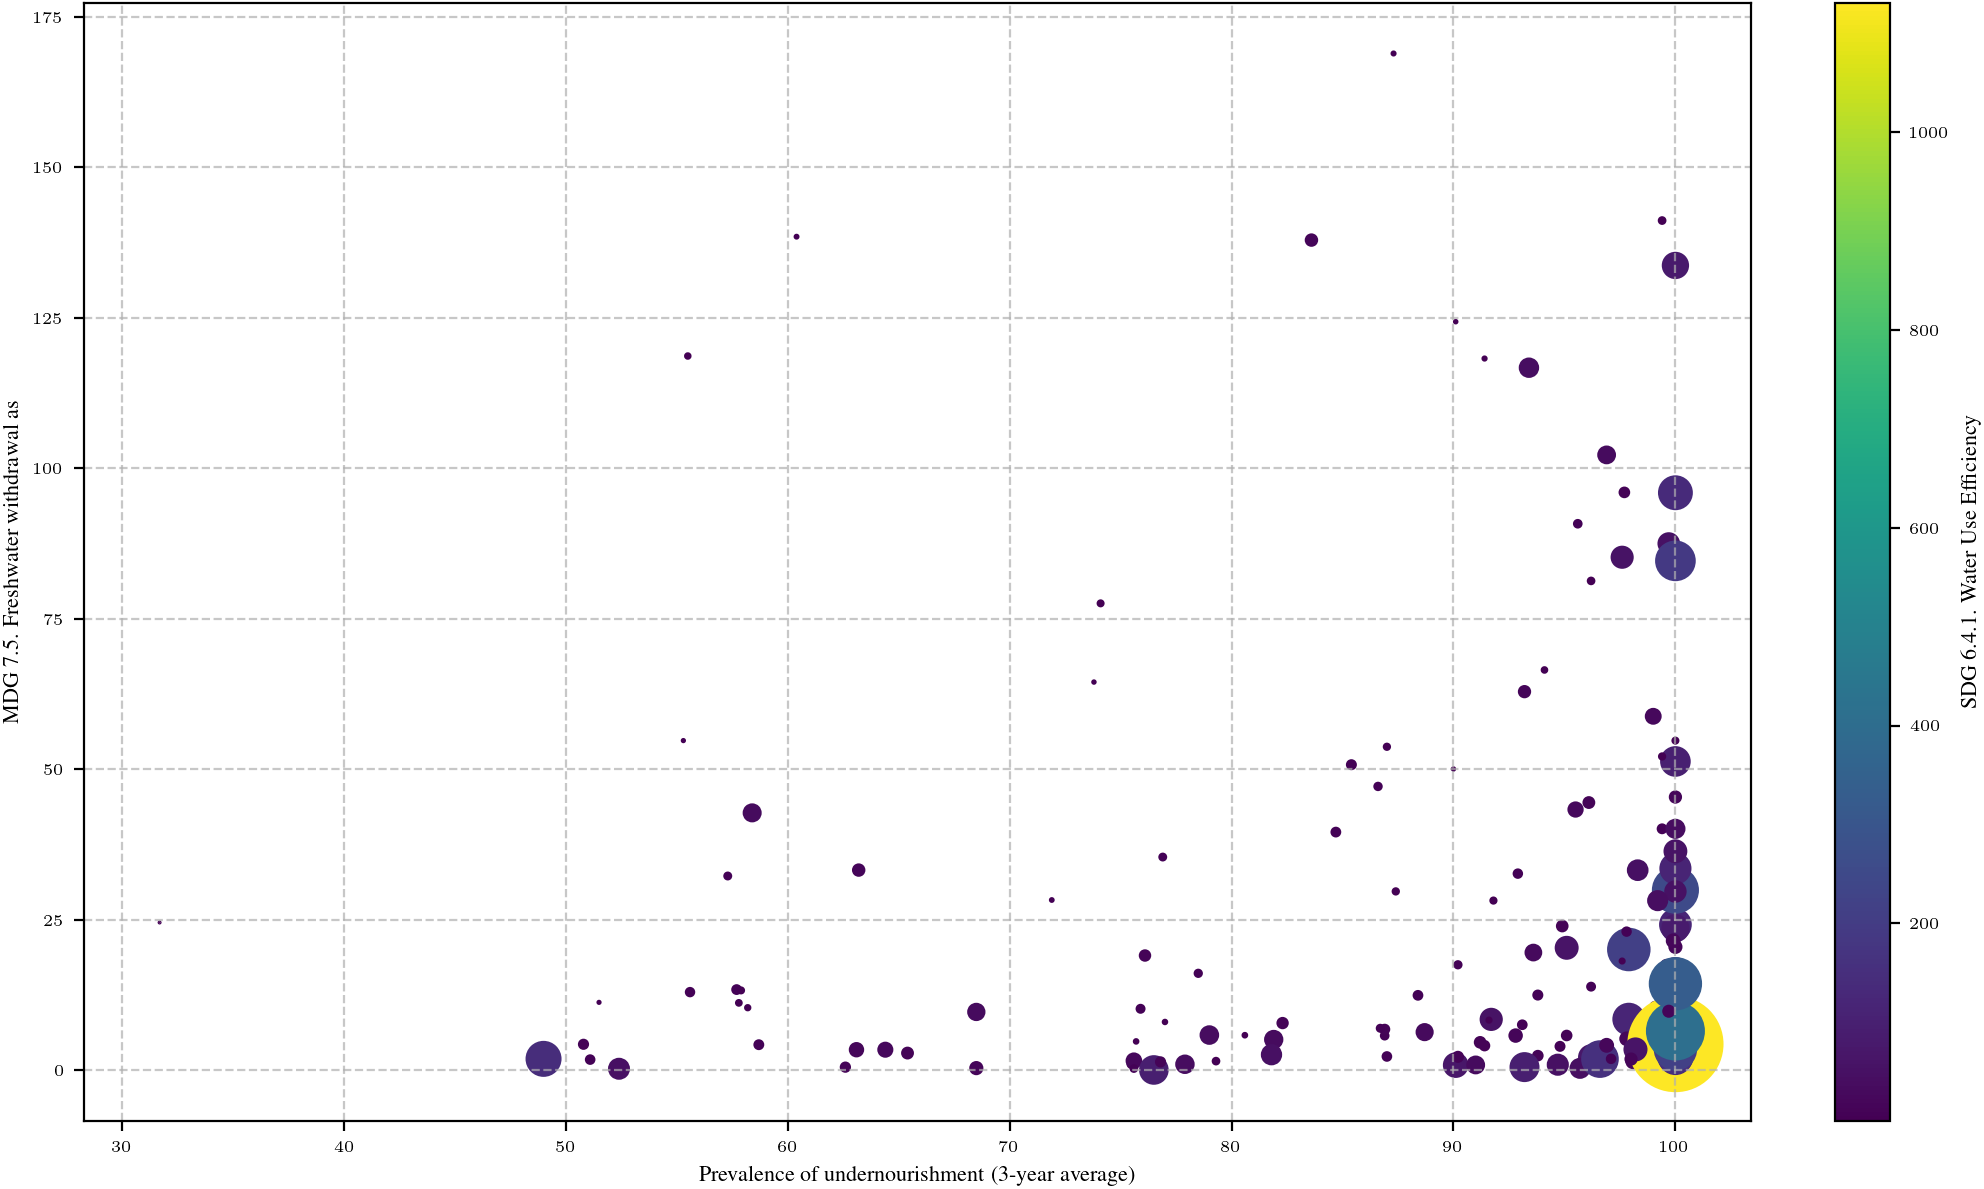

In [29]:

relevant_vars = ['Prevalence of undernourishment (3-year average)',
                 'MDG 7.5. Freshwater withdrawal as % of total renewable water resources',
                 'SDG 6.4.1. Water Use Efficiency']

scatterplot(i, 2018)

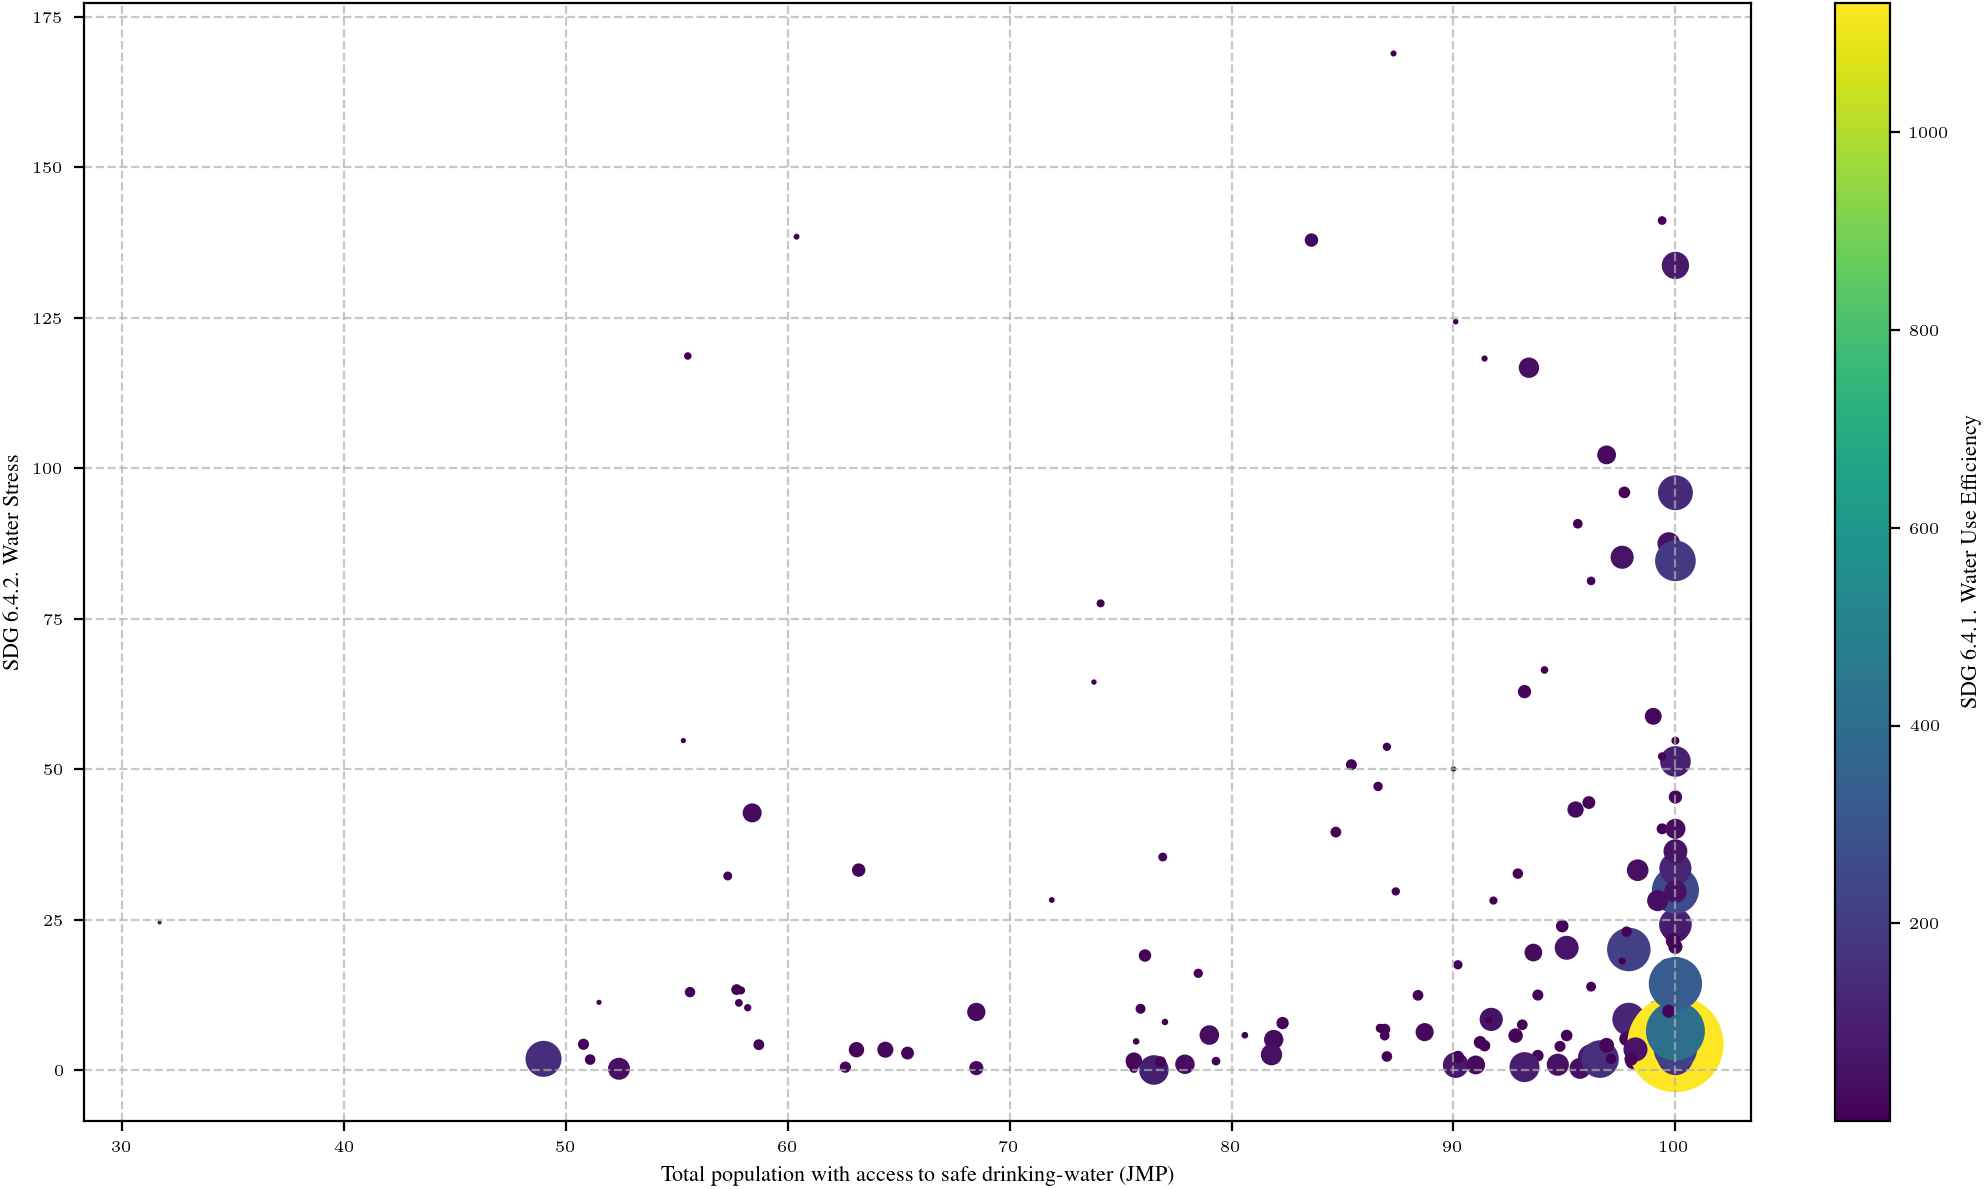

In [30]:

relevant_vars = ['Total population with access to safe drinking-water (JMP)',
                 'SDG 6.4.2. Water Stress',
                 'SDG 6.4.1. Water Use Efficiency']

scatterplot(i, 2018)